In [10]:
import numpy as np
import mkl_fft
from functools import partial
import copy

# custom modules
from filters import *
from convolution import *
from core import *
from scatutils import *
from test_scatnet import *

import matplotlib.pylab as plt
%matplotlib inline

import librosa
import IPython.display as ipd

In [11]:
# Set size of averaging window T, and signal length N
T = 2**10
N = 2**16

# Set filter bank options
filt_opt_bank = [FiltOptions(Q = 8, T = T,
                          filter_type = 'morlet_1d',
                          boundary = 'symm'),
             FiltOptions(Q = 1, T = T,
                          filter_type = 'morlet_1d',
                          boundary = 'symm')]
# Set scattering options
scat_opt = ScatOptions()
scat_opt.M = 2

# Create filter bank
Wop, bank  = wavelet_factory_1d(N, filt_opt_bank, scat_opt)   

In [12]:
# Generate input to the scattering network: array of shape (N,1,K),
# where K is the number of signals
K = 40
signal_generated = np.random.normal(size = (N, 1, K))

In [13]:
# or load input
wav_file = '/home/julia/DeepVoice_project/LibriSpeech_small/train-clean-100/19/198/19-198-0002.wav'
signal, sr = librosa.core.load(wav_file)

signal_crop = signal[:2**17]
signal_crop = signal_crop - signal_crop.mean(axis = 0)
print(signal_crop.shape)

ipd.Audio(signal, rate = sr)

(131072,)


In [14]:
# Count scattering transform
# x = signal_generated
x = signal_crop[:,np.newaxis, np.newaxis]
S, Us = scat(x, Wop)

In [15]:
# Normalize scattering coeffisients
S_renormed = renorm_scat(S)

In [16]:
# Take the logarithm
S_renormed_log = log_scat(S_renormed)

(220, 256, 1, 1)


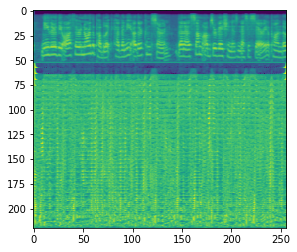

In [17]:
# Format  scattering representation
# format_type = 'table' if one table for coeffisients of all orders
# format_type = 'order_table' if one table for coeffisients of one order

S_table, _ = format_scat(S_renormed_log, format_type = 'table')
print(S_table.shape)

S_table = S_table[:,:,-1,:]
plt.imshow(S_table[:,:,0])

(1, 256, 1, 1)


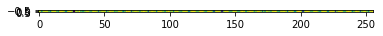

(52, 256, 1, 1)


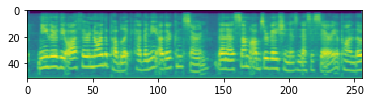

(167, 256, 1, 1)


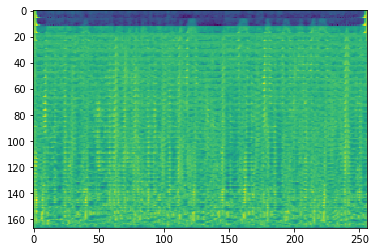

In [18]:
S_order_table, _ = format_scat(S_renormed_log, format_type = 'order_table')

for table in S_order_table:
    print(table.shape)

    table = table[:,:,-1,:]
    plt.imshow(table[:,:,0])
    plt.show()